## A. Creating Spark Session and Loading the Data

###  Importing Libraries : 

#### 1) Spark Context :  
Spark Context is the entry point to the services of Apache Spark.This library is imported to initialize spark.

#### 2) Spark Session : 
Importing Sparksession to allow programming Spark with DataFrame and DataSets.

#### 3) SQL Functions

Importing SQL functions such as mean(),when(),col() etc.


#### 3) Feature Transformation : 

Importing feature transforemers  and estimators , such as  StringIndexer,OneHotEncdoer and VectorAssembler from pyspark.ml.features module.

#### 4) MultiClassificationEvaluator : 

MultiClassificationEvaluator  is used to calculate the accuracy. It accepts two columns , the 
raw Predictions and the label. 

#### 5) Classification Algorithms:

The Libraries DecisionTreeClasifier, RandomForestClassifier ,GBTClassifier,LogisticRegression are imported
from the pyspark.ml.classification for the Classification Algorithms.


#### 6) Matplotlib : 

The library Matplotlib is imported to plot the Bar Graph for the Accuracies.



In [1]:

from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler 
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier,RandomForestClassifier,GBTClassifier,LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
from pyspark.mllib.evaluation import MulticlassMetrics,BinaryClassificationMetrics






#### Step 1 : Step 01: Import ​ pyspark ​ and initialize Spark

In [2]:
#step 1 Code :
from pyspark import SparkContext, SparkConf 
from pyspark.sql import SparkSession

#Using the getOrCreate() function to create a new spark context or to get an existing Spark Context.
sc = SparkContext.getOrCreate()


# If there is no existing spark context, we now create a new context
if (sc is None):  # Initializing an if loop to Check whether there is an existing Spark Context or not.
    # using the SparkContext() function to create a new spark context if there is no existing Spark Context
    # local[4] is running Spark Locally with 4 working processors.
    # The app name is  the name that is shown on the Spark Clustering UI
    sc = SparkContext(master="local[4]", appName="Assignment 2")
    
    
#initializing a SparkSession with sparkContext = sc
spark = SparkSession(sparkContext=sc)

# Step 02: Load the dataset and print the schema and total number of entries

**Loading the data frame Data Frame**

The data frame is loaded with  the spark.read.csv() function. The parameter header = True  includes the heading. The parameter inferSchema  = True is used to correctly represent the datatypes of the Data Frame


In [3]:
weather_data = spark.read.csv('weatherAUS.csv',header = True,inferSchema = True)  # Reading a Spark data frame
weather_data.printSchema()  # using printSchema() function to print the schema of the dataframe

root
 |-- Date: timestamp (nullable = true)
 |-- Location: string (nullable = true)
 |-- MinTemp: string (nullable = true)
 |-- MaxTemp: string (nullable = true)
 |-- Rainfall: string (nullable = true)
 |-- Evaporation: string (nullable = true)
 |-- Sunshine: string (nullable = true)
 |-- WindGustDir: string (nullable = true)
 |-- WindGustSpeed: string (nullable = true)
 |-- WindDir9am: string (nullable = true)
 |-- WindDir3pm: string (nullable = true)
 |-- WindSpeed9am: string (nullable = true)
 |-- WindSpeed3pm: string (nullable = true)
 |-- Humidity9am: string (nullable = true)
 |-- Humidity3pm: string (nullable = true)
 |-- Pressure9am: string (nullable = true)
 |-- Pressure3pm: string (nullable = true)
 |-- Cloud9am: string (nullable = true)
 |-- Cloud3pm: string (nullable = true)
 |-- Temp9am: string (nullable = true)
 |-- Temp3pm: string (nullable = true)
 |-- RainToday: string (nullable = true)
 |-- RainTomorrow: string (nullable = true)



#### The number of entries in the DataFrame : 

The number of entries in the dataframe can be foundout using the count() function, The count() function
returns the number of rows of the dataframe

In [4]:
print("The total  number of entries in the data are : ",weather_data.count())

The total  number of entries in the data are :  142193


# B. Data Cleaning and Processing



###  Step 03: Delete columns from the dataset


#### Methodology : 
A list is defined inorder to store the columns to  be dropped. The spark.dataframe.select() method is used to select all the columns that are not in the dropped columns list.


In [5]:

# Delete useless data
# Creating a list of useless columns
drop_list = ['Date', 'Location', 'Evaporation', 'Cloud9am','Cloud3pm','Temp9am','Temp3pm','Sunshine']
# Selecting the columns that are not present in the dropped columns list 
weather_data = weather_data.select([column for column in weather_data.columns if column not in drop_list])

# Printing the Schema using printSchema() after dropping the columns
weather_data.printSchema()

root
 |-- MinTemp: string (nullable = true)
 |-- MaxTemp: string (nullable = true)
 |-- Rainfall: string (nullable = true)
 |-- WindGustDir: string (nullable = true)
 |-- WindGustSpeed: string (nullable = true)
 |-- WindDir9am: string (nullable = true)
 |-- WindDir3pm: string (nullable = true)
 |-- WindSpeed9am: string (nullable = true)
 |-- WindSpeed3pm: string (nullable = true)
 |-- Humidity9am: string (nullable = true)
 |-- Humidity3pm: string (nullable = true)
 |-- Pressure9am: string (nullable = true)
 |-- Pressure3pm: string (nullable = true)
 |-- RainToday: string (nullable = true)
 |-- RainTomorrow: string (nullable = true)



## Step 04: Print the number of missing data in each column.

The missing data can be foundout by selecting a subdataframe of all the rows containing the string "NA" as
the missing data is represented by the string NA.The .count() function is used to count the number of rows 
contaaining the string **NA** 

In [6]:
#  initializing a for loop to iterate through columns 
for column in weather_data.columns:
    # Selecting Null Values by equating each column to NA 
    # Using the .count() function to count the number of entries
    Null_values = weather_data[weather_data[column] == "NA"].count()
    # Printing the number of values by using typecasting for the NullValues as they are integer type
    print("Number of nulls in column " + str(column) +  " are :  " + str(Null_values))

Number of nulls in column MinTemp are :  637
Number of nulls in column MaxTemp are :  322
Number of nulls in column Rainfall are :  1406
Number of nulls in column WindGustDir are :  9330
Number of nulls in column WindGustSpeed are :  9270
Number of nulls in column WindDir9am are :  10013
Number of nulls in column WindDir3pm are :  3778
Number of nulls in column WindSpeed9am are :  1348
Number of nulls in column WindSpeed3pm are :  2630
Number of nulls in column Humidity9am are :  1774
Number of nulls in column Humidity3pm are :  3610
Number of nulls in column Pressure9am are :  14014
Number of nulls in column Pressure3pm are :  13981
Number of nulls in column RainToday are :  1406
Number of nulls in column RainTomorrow are :  0


### Step 05: Fill the missing data with average value and maximum occurrence value.

### Imputing Missing Values for Numerical Data with Mean : 


#### Methodology : 
A list of all the numeric columns is selected . The missing values  is imputed iteratively for each element in the list i.e. for each column in the list. The mean imputation is used for the Numeric columns, the mean is computed using the mean() function from the pyspark sql functions and then the .collect() method is used to collect the row object as a list and the first element, and the mean object is selected by indexing [0]['mean']. 

The when() function is used to implement the condition i.e. when the column value is NA, the NA value is replaced  with the mean. .otherwise() function is used to represent the non Missing values. The .withColumn() function is used to perform specific operations on a column.



In [7]:
# A list of Numerical Columns : 
numerical_columns = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm']
for i in numerical_columns: # Initializing a for loop to iterate through the list of Numerical values
    # Imputing the missing values with mean using mean() function
    # When() function is used for the conditional imputation, when the column values are NA the mean is used to 
    # impute the column values.    

    weather_data = weather_data.withColumn(i,when(col(i) == "NA",str(weather_data.select(mean(col(i)).alias('mean')).collect()[0]['mean'])).otherwise(col(i)))
    


In [8]:
weather_data.printSchema() # Printing the schema of the data.

root
 |-- MinTemp: string (nullable = true)
 |-- MaxTemp: string (nullable = true)
 |-- Rainfall: string (nullable = true)
 |-- WindGustDir: string (nullable = true)
 |-- WindGustSpeed: string (nullable = true)
 |-- WindDir9am: string (nullable = true)
 |-- WindDir3pm: string (nullable = true)
 |-- WindSpeed9am: string (nullable = true)
 |-- WindSpeed3pm: string (nullable = true)
 |-- Humidity9am: string (nullable = true)
 |-- Humidity3pm: string (nullable = true)
 |-- Pressure9am: string (nullable = true)
 |-- Pressure3pm: string (nullable = true)
 |-- RainToday: string (nullable = true)
 |-- RainTomorrow: string (nullable = true)



### Imputing missing values for Non Numeric columns with Mode ( Most Repeated Value).

The missing values in the non numeric columns are imputed with the mode, i.e. the most frequently occuring value.

All the non numeric columns are taken in a list and the imputation is done iteratively for each column in the list.The counts of all the values in the column can be foundout by the .groupB().count() function.The orderBy() function, is used to order the columns in either ascending or descending order.The columns are ordered by the desc('count') i.e. in the decreasing order, the most repeated value on the top.The .collect() method is used to collect the Row Objects into a list and the the element at the 0th index of the  specific column i.e. the most frequent value of the column is selected and is replaced.

The .withColoumn() function is used to make modifications on a specific column.The when() function is used for conditional imputation. 

In [9]:
# Taking the non numeric columns in a list
non_numeric_columns = [x for x in weather_data.columns if x not in numerical_columns]
for i in non_numeric_columns: # for loop to iterate through the elements of the list
    # replacing the NA values with the Mode, in the Non-numeric columns . 
    weather_data = weather_data.withColumn(i,when(col(i) == "NA",weather_data.groupBy(i).count().orderBy(desc('count')).collect()[0][i]).otherwise(col(i)))


In [10]:
weather_data.printSchema() # Using the printSchema() function to print the schema of the dataframe

root
 |-- MinTemp: string (nullable = true)
 |-- MaxTemp: string (nullable = true)
 |-- Rainfall: string (nullable = true)
 |-- WindGustDir: string (nullable = true)
 |-- WindGustSpeed: string (nullable = true)
 |-- WindDir9am: string (nullable = true)
 |-- WindDir3pm: string (nullable = true)
 |-- WindSpeed9am: string (nullable = true)
 |-- WindSpeed3pm: string (nullable = true)
 |-- Humidity9am: string (nullable = true)
 |-- Humidity3pm: string (nullable = true)
 |-- Pressure9am: string (nullable = true)
 |-- Pressure3pm: string (nullable = true)
 |-- RainToday: string (nullable = true)
 |-- RainTomorrow: string (nullable = true)



**Testing the Missing Value imputations** 

The number of Nulls after imputing the missing values are : 

In [11]:
for column in weather_data.columns:
    # Selecting Null Values by equating each column to NA 
    # Using the .count() function to count the number of entries
    Null_values = weather_data[weather_data[column] == "NA"].count()
    # Printing the number of values by using typecasting for the NullValues as they are integer type
    print("Number of nulls after imputation  in column " + str(column) +  " are :  " + str(Null_values))

Number of nulls after imputation  in column MinTemp are :  0
Number of nulls after imputation  in column MaxTemp are :  0
Number of nulls after imputation  in column Rainfall are :  0
Number of nulls after imputation  in column WindGustDir are :  0
Number of nulls after imputation  in column WindGustSpeed are :  0
Number of nulls after imputation  in column WindDir9am are :  0
Number of nulls after imputation  in column WindDir3pm are :  0
Number of nulls after imputation  in column WindSpeed9am are :  0
Number of nulls after imputation  in column WindSpeed3pm are :  0
Number of nulls after imputation  in column Humidity9am are :  0
Number of nulls after imputation  in column Humidity3pm are :  0
Number of nulls after imputation  in column Pressure9am are :  0
Number of nulls after imputation  in column Pressure3pm are :  0
Number of nulls after imputation  in column RainToday are :  0
Number of nulls after imputation  in column RainTomorrow are :  0


## Step 06: Data transformation

#### Converting Numeric Columns to Double :

The numeric columns of the dataframe are casted to double using the .cast() function . The 'double' key words indicates the double type.

The .cast() function is used to cast the dataframe columns from one type to another.

In [12]:
for i in numerical_columns: #Iterating through the numeric column list
    weather_data = weather_data.withColumn(i,col(i).cast("double")) # using cast function to convert the type

In [13]:
weather_data.printSchema() # print Schema to check the type 

root
 |-- MinTemp: double (nullable = true)
 |-- MaxTemp: double (nullable = true)
 |-- Rainfall: double (nullable = true)
 |-- WindGustDir: string (nullable = true)
 |-- WindGustSpeed: double (nullable = true)
 |-- WindDir9am: string (nullable = true)
 |-- WindDir3pm: string (nullable = true)
 |-- WindSpeed9am: double (nullable = true)
 |-- WindSpeed3pm: double (nullable = true)
 |-- Humidity9am: double (nullable = true)
 |-- Humidity3pm: double (nullable = true)
 |-- Pressure9am: double (nullable = true)
 |-- Pressure3pm: double (nullable = true)
 |-- RainToday: string (nullable = true)
 |-- RainTomorrow: string (nullable = true)



### Converting Non-Numeric to double 

String Indexer is a feature Estimator that  encodes a column of Lables to a Column of Label indicies. The String indexer model can be generated with the StringIndexer() function.This function takes two arguments inputCol i.e. the column to be indexed and the outputCol , the name of the output Column.

The .fit() method is used to fit the dataframe and produce a Transformer i.e. the string indexer model is trained on the dataframe df. The Transformer is implemented using the .transform() function inorder to obtained the indexed column.

In [14]:
for column in non_numeric_columns:  # iterating through non numeric columns
    # building a string indexer model
    indexer = StringIndexer(inputCol = column, outputCol = column+"index")
#     fiting and transforming the string indexer model on the dataframe 
    weather_data = indexer.fit(weather_data).transform(weather_data)

In [15]:
weather_data.printSchema() # Print the Schema to check the data type of new columns 

root
 |-- MinTemp: double (nullable = true)
 |-- MaxTemp: double (nullable = true)
 |-- Rainfall: double (nullable = true)
 |-- WindGustDir: string (nullable = true)
 |-- WindGustSpeed: double (nullable = true)
 |-- WindDir9am: string (nullable = true)
 |-- WindDir3pm: string (nullable = true)
 |-- WindSpeed9am: double (nullable = true)
 |-- WindSpeed3pm: double (nullable = true)
 |-- Humidity9am: double (nullable = true)
 |-- Humidity3pm: double (nullable = true)
 |-- Pressure9am: double (nullable = true)
 |-- Pressure3pm: double (nullable = true)
 |-- RainToday: string (nullable = true)
 |-- RainTomorrow: string (nullable = true)
 |-- WindGustDirindex: double (nullable = false)
 |-- WindDir9amindex: double (nullable = false)
 |-- WindDir3pmindex: double (nullable = false)
 |-- RainTodayindex: double (nullable = false)
 |-- RainTomorrowindex: double (nullable = false)



# Step 07: Create the feature vector and divide the dataset 

### Removing unecessary columns:

All the old columns that are not required are removed i..e the original columns before casting the datatypes.

In [16]:
# the columns that  are not required are removed using the .select() function of the spark dataframes
new_data = weather_data.select([column for column in weather_data.columns if column not in non_numeric_columns])
# print the schema after removing the columns
new_data.printSchema()

root
 |-- MinTemp: double (nullable = true)
 |-- MaxTemp: double (nullable = true)
 |-- Rainfall: double (nullable = true)
 |-- WindGustSpeed: double (nullable = true)
 |-- WindSpeed9am: double (nullable = true)
 |-- WindSpeed3pm: double (nullable = true)
 |-- Humidity9am: double (nullable = true)
 |-- Humidity3pm: double (nullable = true)
 |-- Pressure9am: double (nullable = true)
 |-- Pressure3pm: double (nullable = true)
 |-- WindGustDirindex: double (nullable = false)
 |-- WindDir9amindex: double (nullable = false)
 |-- WindDir3pmindex: double (nullable = false)
 |-- RainTodayindex: double (nullable = false)
 |-- RainTomorrowindex: double (nullable = false)



####  Encoding the categorical  colums : 


The indexed columns are encoded into binary vectors, using the One hot Encoder. 

One Hot encoder is a transformer that takes in an indexed variable and maps a feature vector to that index variable.

#### Methodology : 

All the categorical columns are stored in a list and then the categorical columns are iterated and passed in 
the OneHotEncoder Function which accepts 2 arguments,i.e. the input column and the name of the output column.

The .transform() method is used to transform the data , by converting the indexed strings into vectors.

In [17]:

# The categorical columns are stored in a list
categorical_columns = ['WindGustDirindex','WindDir9amindex','WindDir3pmindex','RainTodayindex']

for column in categorical_columns: # iterating through the categorical columns
    encoder=OneHotEncoder(inputCol=column,outputCol = column + "vec") # initializing oneHotEncoder transformer
    new_data  = encoder.transform(new_data) # applying.transform 

In [18]:
new_data.show(2) # using show() function to show the first 2 rows 

+-------+-------+--------+-------------+------------+------------+-----------+-----------+-----------+-----------+----------------+---------------+---------------+--------------+-----------------+-------------------+------------------+------------------+-----------------+
|MinTemp|MaxTemp|Rainfall|WindGustSpeed|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|WindGustDirindex|WindDir9amindex|WindDir3pmindex|RainTodayindex|RainTomorrowindex|WindGustDirindexvec|WindDir9amindexvec|WindDir3pmindexvec|RainTodayindexvec|
+-------+-------+--------+-------------+------------+------------+-----------+-----------+-----------+-----------+----------------+---------------+---------------+--------------+-----------------+-------------------+------------------+------------------+-----------------+
|   13.4|   22.9|     0.6|         44.0|        20.0|        24.0|       71.0|       22.0|     1007.7|     1007.1|             0.0|            6.0|            7.0|           0.0|   

In [19]:
new_data.printSchema() # Printing the schema 

root
 |-- MinTemp: double (nullable = true)
 |-- MaxTemp: double (nullable = true)
 |-- Rainfall: double (nullable = true)
 |-- WindGustSpeed: double (nullable = true)
 |-- WindSpeed9am: double (nullable = true)
 |-- WindSpeed3pm: double (nullable = true)
 |-- Humidity9am: double (nullable = true)
 |-- Humidity3pm: double (nullable = true)
 |-- Pressure9am: double (nullable = true)
 |-- Pressure3pm: double (nullable = true)
 |-- WindGustDirindex: double (nullable = false)
 |-- WindDir9amindex: double (nullable = false)
 |-- WindDir3pmindex: double (nullable = false)
 |-- RainTodayindex: double (nullable = false)
 |-- RainTomorrowindex: double (nullable = false)
 |-- WindGustDirindexvec: vector (nullable = true)
 |-- WindDir9amindexvec: vector (nullable = true)
 |-- WindDir3pmindexvec: vector (nullable = true)
 |-- RainTodayindexvec: vector (nullable = true)



###  Feature generation using Vector Assembler:

The Vector assembler takes as input all the raw features and transforms into a single
feature vector.

The features are given as a list.

The VectorAssembler() function takes in two inputs the inputCols and the outputCol, the input coloumn is the list of columns that are to be combined into a feature.

The outputCol is the name of the coloumn that should be generated.


The  .transform() method is used to generate the features.

In [20]:
# The assembler input is stored in a list 
assembler_input =['WindGustDirindexvec', 'WindDir9amindexvec', 'WindDir3pmindexvec', 'RainTodayindexvec', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm',  'Humidity9am','Humidity3pm', 'Pressure9am','Pressure3pm']

# Calling the VectorAssembler() function to  build the vector assembler transformer.
assembler = VectorAssembler(inputCols = assembler_input, outputCol="features") 

# using the .transform() function to transform the columns in the dataframe 
new_data_2  = assembler.transform(new_data)

In [21]:
new_data_2.printSchema() # Printing the Schema of the dataframe.

root
 |-- MinTemp: double (nullable = true)
 |-- MaxTemp: double (nullable = true)
 |-- Rainfall: double (nullable = true)
 |-- WindGustSpeed: double (nullable = true)
 |-- WindSpeed9am: double (nullable = true)
 |-- WindSpeed3pm: double (nullable = true)
 |-- Humidity9am: double (nullable = true)
 |-- Humidity3pm: double (nullable = true)
 |-- Pressure9am: double (nullable = true)
 |-- Pressure3pm: double (nullable = true)
 |-- WindGustDirindex: double (nullable = false)
 |-- WindDir9amindex: double (nullable = false)
 |-- WindDir3pmindex: double (nullable = false)
 |-- RainTodayindex: double (nullable = false)
 |-- RainTomorrowindex: double (nullable = false)
 |-- WindGustDirindexvec: vector (nullable = true)
 |-- WindDir9amindexvec: vector (nullable = true)
 |-- WindDir3pmindexvec: vector (nullable = true)
 |-- RainTodayindexvec: vector (nullable = true)
 |-- features: vector (nullable = true)



# Creating Feature and Label Data Frame 

Creating a DataFrame with the feature and the labels as the columns

In [22]:
selectedCols = ['RainTomorrowindex','features'] # storing features and labels in a  list for Sellecting the features and labels from the daataframe
df_model = new_data_2.select(selectedCols) # creating a new dataframe with features and labels

In [23]:
df_model = df_model.withColumnRenamed('RainTomorrowindex','label') # renaming the label column using the withColoumnRenamed function
df_model.show(5) # using the show() function to display the first n rows of the dataframe .

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(56,[0,21,37,45,4...|
|  0.0|(56,[9,24,33,45,4...|
|  0.0|(56,[6,21,33,45,4...|
|  0.0|(56,[13,16,40,45,...|
|  0.0|(56,[0,25,38,45,4...|
+-----+--------------------+
only showing top 5 rows



# Dividing the dataset into train and test 

The train and test data are divided by using the randomSplit() function which takes in a list that consits of the proportions of the train and test data.

In [24]:
train, test = df_model.randomSplit([0.7, 0.3]) #splitting the train test using the randomSplit() function.
# taking 70 percent of the data for the training set and 30 percent of the day for testing set. 

## C. Apply Machine Learning Algorithms


## Step 08: Apply machine learning classification algorithms on the dataset and compare their accuracy. Plot the accuracy as bar graph.



### a.)  Logistic Regression : 

In statistics, the logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. The logistic Regression model can be built by using the LogisticRegression() function.The logistic regression function takes in 3 arguments, the features column, the label column and the maximum number of iterations. The model is trained on the training data, using the .fit() function.The predictions are done using the .transform() function , on the test data.The evaluator used for evaluating the accuracy is the Binary Classification Evaluator.





In [25]:

# Building  a logistic regression model
# The logistic regression model takes in 3 arguments, the features, the label and the maximum iterations.
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label',maxIter = 10)
# Training the model using the .fit() function on the training data.
lrModel = lr.fit(train)


# Predicting the values using the .transfrom() function on the test data
lrpredictions = lrModel.transform(test)


# Defining a Binary Classification Evaluator to compute the accuracy of the model 
evaluator = MulticlassClassificationEvaluator()


# Calculating the accuracy interms of percentage
#i.e. multiplying by 100 
accuracy_logistic  = (evaluator.evaluate(lrpredictions))*100

# printing the accuracy 
print("accuracy for Logistic Regression : " ,accuracy_logistic)




accuracy for Logistic Regression :  80.1898000144913


### b)  Decision Tree 


A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility.The DecisionTree model can be built by using the DecisionTreeClasifier() function. The DecisionTreeClasifier function takes in 3 arguments, the features column, the label column and the maximum depth. The maximum Depth is How deeper you allow the tree to go to . 


The model is trained on the training data, using the .fit() function.The predictions are done using the .transform() function , on the test data.The evaluator used for evaluating the accuracy is the Binary Classification Evaluator.

In [26]:


# Building a decision tree model with the features and labels and setting the maximum depth to 30. 
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 30)

#training the model with the train data
dtModel = dt.fit(train)

#Use the  Transformer.transform() method to predict test data
predictions_decision_tree = dtModel.transform(test)


# Defining an evaluator to predict the accuracy of the model 
evaluator = MulticlassClassificationEvaluator()



# computing the accuracy of the model by using the binary class evaluator, and representing the accuracy interms of percentages
accuracy_decisiontree = evaluator.evaluate(predictions_decision_tree) * 100 

# Printing the Accuracy 
print("Accuracy for decisiontree :" ,accuracy_decisiontree)











Accuracy for decisiontree : 78.22970999715268


### c) Random Forest : 

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees. The Random Forest  model can be built by using the RandomForestClasifier() function.The RandomForestClasifier function takes in 3 arguments, the features column, the label column and the numTrees which represents the Number of Trees.


The model is trained on the training data, using the .fit() function.The predictions are done using the .transform() function , on the test data. The evaluator used for evaluating the accuracy is the Binary Classification Evaluator.

In [27]:

# Building a Random Forest Model using RandomForestClassifier()
rf = RandomForestClassifier(labelCol="label",featuresCol="features", numTrees=10,maxDepth = 25)
rf_model = rf.fit(train) # training the model using fit() function

predictions_rf = rf_model.transform(test) # predicting the values of the test data using Transformer.transform() function.


# Defining the Binary Classification evaluator to evaluate the accuracy.
evaluator =  MulticlassClassificationEvaluator()


# Computing the accuracy of the predicted model and multiplying by 100 inorder to represent the accuracy as percentages.
accuracy_randomforest = (evaluator.evaluate(predictions_rf))*100
print("accuracy of random forest is : ")
print(accuracy_randomforest) # Printing the accuracy 

accuracy of random forest is : 
82.52060697860145


### d)  GBT 

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion. The Gradient boosting model can be built by using the GBTClasifier() function.The GBTClasifier function takes in 3 arguments, the features column, the label column and the maxIter , which represents the maximum Iterations . 

The model is trained on the training data, using the .fit() function.The predictions are done using the .transform() function , on the test data.The evaluator used for evaluating the accuracy is the Multi Classification Evaluator.

In [28]:
# Building the GBT Model()
gbt = GBTClassifier(labelCol = 'label',featuresCol = 'features',maxIter=10)
# Training the GBT model on train data
gbtModel = gbt.fit(train)
# Predicting the values of test data using Transformer.transform() function
predictions_gbt = gbtModel.transform(test)

#Defining a BinaryClassificationevaluator to predict the accuracy
evaluator = MulticlassClassificationEvaluator()


#  Computing the accuracy using the evaluator and multiplying into 100 to represent in terms of percentages
accuracy_gbt = (evaluator.evaluate(predictions_gbt))* 100 

# Printing the accuracy for gbt 

print("Accuracy for GBT :  " + str(accuracy_gbt))



Accuracy for GBT :  82.28644965554273


# Plot for Accuracies : 

A barplot is used to plot the accuracies.

All the accuracies are stored in a list and are passed in the y axis.

The corresponding model names are stored in a list and are passed in the x-axis.

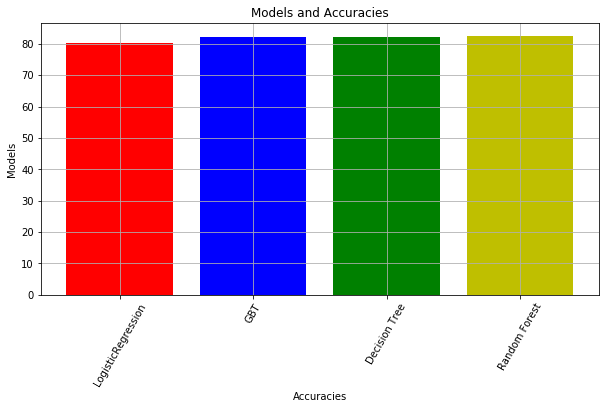

In [29]:
accuracies = [accuracy_logistic,accuracy_gbt,accuracy_gbt,accuracy_randomforest]
x_axis = ["LogisticRegression","GBT","Decision Tree",'Random Forest']

plt.figure(figsize=(10,5))
plt.bar(x_axis,accuracies,color = ['r','b','g','y'])

plt.title('Models and Accuracies')
plt.ylabel('Models')
plt.xlabel('Accuracies')
plt.xticks(rotation = 60)

plt.grid()
plt.show()

# Step 09 
### Calculating Confusion Matrix and finding the precision recall and F1 Score of each Classification Algorithm 

A **confusion matrix** is a table layout that allows the visualization of the performance of an Algorithm.

**Recall** is the ratio of the correctly predicted observations to all the observations in actuall class
yes. **Recall** is refered to as true positive rate or sensitivity. **Precision** is the positive predictive value 
The confusion matrix is generated by the MulticlassMetrics().confusionMatrix() function. This function takes in the actual values and predictions as tuples.This can be achieved by converting the predicted dataframe to an RDD and then using map and lambda function to select the prediction and label.The .select() function of the Spark Dataframe is used to select the predictions and labels . 


The confusion matrix is of the form **[ [ TN, FP], [FN , TP ] ]** , This order is considering label Yes as positive. where FN = False Negative , FP = False positive , TN = True Negative , TP = True Positive. The formulae are : 

Recall = TP/TP+FN

Precision = TP/TP+FP

**F1Score = 2*(Recall * Precision)/(Recall + Precision)**

Additional functions used for this task: 

The additional functions used for this task are .map() for the RDD, inorder to select the labels and the predictions.Also, the .toArray() function is used to convert the confusin matrix to NumpyArray

#### Confusion Matrix for GBT : 


In [30]:
##  Using MulticlassMetrics() .rdd()  and .confusionMatrix() function to generate a confusion matrix

metrics_gbt = MulticlassMetrics(predictions_gbt.select('label','prediction').rdd.map(lambda x: (x.prediction,x.label)))
confusion_GBT = metrics_gbt.confusionMatrix().toArray()

# Generating Precision Recall and F1 Score from  Confusion Matrix : 

precision_GBT =  confusion_GBT[1][1]/ (confusion_GBT[0][1] + confusion_GBT[1][1])
recall_GBT = confusion_GBT[1][1]/ (confusion_GBT[1][0] + confusion_GBT[1][1])
F1Score_GBT = 2 * ((precision_GBT * recall_GBT)  / (precision_GBT + recall_GBT))



print('confusion matrix for gbt is : ')
print(' ')
print(confusion_GBT)

print('Precision for GBT : '+ str(precision_GBT))
print('Recall for GBT : '+ str(recall_GBT))
print('F1Score for GBT : '+ str(F1Score_GBT))



confusion matrix for gbt is : 
 
[[31525.  1617.]
 [ 5321.  4323.]]
Precision for GBT : 0.7277777777777777
Recall for GBT : 0.448257984238905
F1Score for GBT : 0.5547997946611909


# Confusion matrix for Logistic Regression : 

In [31]:
# Confusion Matrix:

##  Using MulticlassMetrics() .rdd()  and .confusionMatrix() function to generate a confusion matrix
metrics_logistic = MulticlassMetrics(lrpredictions.select('label','prediction').rdd.map(lambda x: (x.prediction,x.label)))
confusion_logistic = metrics_logistic.confusionMatrix().toArray()

# Generating Precision Recall and F1 Score from  Confusion Matrix : 
precision_logistic=  confusion_logistic[1][1]/ (confusion_logistic[0][1] + confusion_logistic[1][1])
recall_logistic = confusion_logistic[1][1]/ (confusion_logistic[1][0] + confusion_logistic[1][1])
F1Score_logistic = 2 * ((precision_logistic * recall_logistic)  / (precision_logistic + recall_logistic))


print('confusion matrix for Logistic regression is ')
print(' ')
print(confusion_logistic)


print("Precision for logistic ",precision_logistic)
print("")
print("Recall for logistic : ",recall_logistic)
print(" ")
print("F1 Score for logistic : ",F1Score_logistic)


confusion matrix for Logistic regression is 
 
[[30882.  2260.]
 [ 5586.  4058.]]
Precision for logistic  0.6422918645140867

Recall for logistic :  0.4207797594359187
 
F1 Score for logistic :  0.5084575867685753


# Confusion Matrix for Random forest  : 

In [32]:
# Confusion Matrix:
##  Using MulticlassMetrics() .rdd()  and .confusionMatrix() function to generate a confusion matrix and the .toArray() function is used to convert the confusion matrix to a NumpyArray()
Metrics_rf = MulticlassMetrics(predictions_rf.select('label','prediction').rdd.map(lambda x: (x.prediction,x.label)))
confusion_rf = Metrics_rf.confusionMatrix().toArray() 

# Generating Precision Recall and F1 Score from  Confusion Matrix : 
precision_rf=  confusion_rf[1][1]/ (confusion_rf[0][1] + confusion_rf[1][1])
recall_rf = confusion_rf[1][1]/ (confusion_rf[1][0] + confusion_rf[1][1])
F1Score_rf = 2 * ((precision_rf * recall_rf)  / (precision_rf + recall_rf))

print('confusion matrix for Random Forest ')
print(confusion_rf)


print("Precision for rf ",precision_rf)
print("")

print("Recall for rf : ",recall_rf)
print(" ")
print("F1 Score for rf : ",F1Score_rf)



confusion matrix for Random Forest 
[[31166.  1976.]
 [ 5005.  4639.]]
Precision for rf  0.7012849584278156

Recall for rf :  0.4810244711737868
 
F1 Score for rf :  0.5706378006027432


# Confusion matrix for Decision Tree : 

In [33]:
# Confusion Matrix:

##  Using MulticlassMetrics() .rdd()  and .confusionMatrix() function to generate a confusion matrix


confusion_decision_tree = MulticlassMetrics(predictions_decision_tree.select('label','prediction').rdd.map(lambda x: (x.prediction,x.label))).confusionMatrix().toArray()

# Computing Precision Recall and F1 Score from the confusion matrix : 
precision_decision_tree=  confusion_decision_tree[1][1]/ (confusion_decision_tree[0][1] + confusion_decision_tree[1][1])
recall_decision_tree = confusion_decision_tree[1][1]/ (confusion_decision_tree[1][0] + confusion_decision_tree[1][1])
F1Score_decision_tree = 2 * ((precision_decision_tree * recall_decision_tree)  / (precision_decision_tree + recall_decision_tree))
print('confusion matrix for decision tree :')
print(' ')
print(confusion_decision_tree)


print("Precision for decision_tree ",precision_decision_tree)

print(" ")
print("Recall for decision_tree : ",recall_decision_tree)


print("")
print("F1 Score for decision_tree : ",F1Score_decision_tree)


confusion matrix for decision tree :
 
[[28456.  4686.]
 [ 4637.  5007.]]
Precision for decision_tree  0.5165583410708758
 
Recall for decision_tree :  0.5191829116549149

F1 Score for decision_tree :  0.517867301029115


**How the Accuracy can be Improved** ?? 

The precision can be seen as a measure of exactness (quality) and recall is measure of completness(quantity). The precision is higher than recall for Logistic Regression, Random Forest and GBT , it indicates that the algorithm generates more relavant results than irrelavant results.The recall is higher than precision for Decision tree,it indicates that the algorithm returned most relavant results. 

The accuracy of the prediction can be improved by:
    
1.) Even though the missing values were imputed, the Outliers should also be detected in the Numeric columns : 
    'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am' and  'Pressure3pm'. The presence of outliers leads to a biased model. 
        
    
    
 2.) Feature Engineering : Changing the scale of variables from original scale to scale between zero and one . i.e. Data Normalization. Data Should be normalized for columns such as Pressure as the values are much higher than other values.
    
 
        
 3.) Feature Selection : Finding the best subset of attributes which explains the relationship between the independent variables and the target variables . The features that have the higher correlation with the label should be slected in order to improve accuracy of the models. 

    
4.) Essemble methods such as Bagging and Bosting which combines multiple weak models and produce much better results.
    
    